In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

In [23]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
df.drop("User ID",axis = 1, inplace = True)

Text(0.5, 1.0, 'Age Distribution')

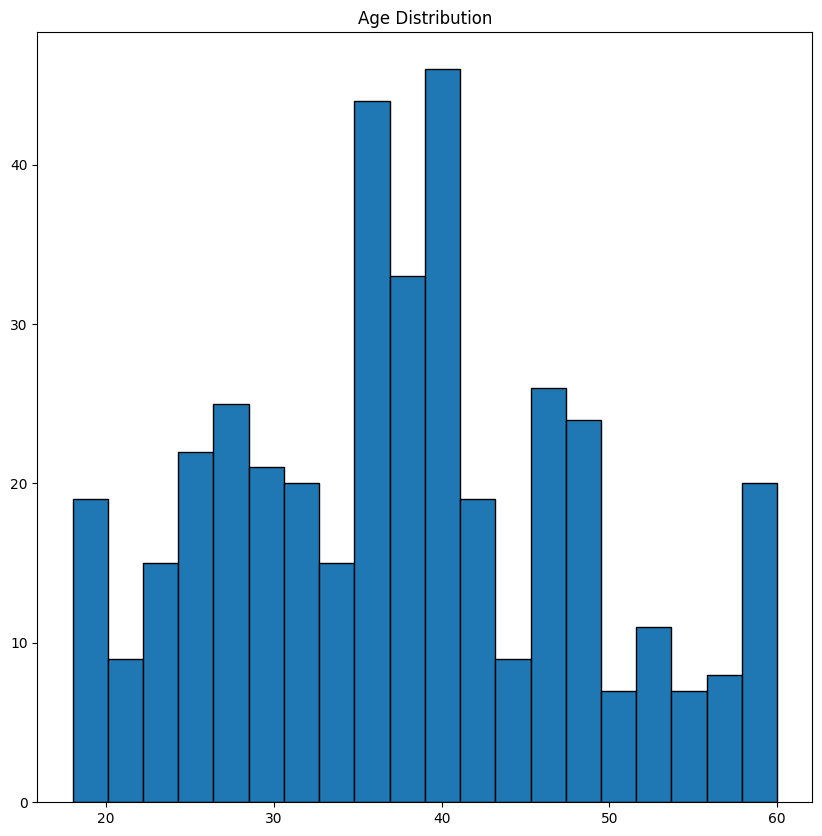

In [26]:
# wymiary wykresu
plt.figure(figsize=(10, 10))
#Jak często różne przedziały wartości dla Age - przedziały po 20
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Estimated Salary Distribution')

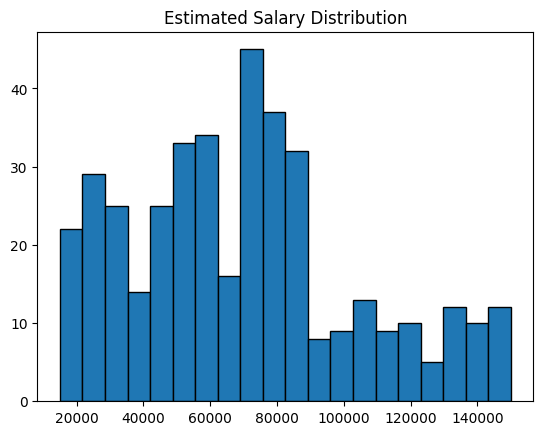

In [27]:
plt.hist(df['EstimatedSalary'], bins=20 , edgecolor='black')
plt.title('Estimated Salary Distribution')

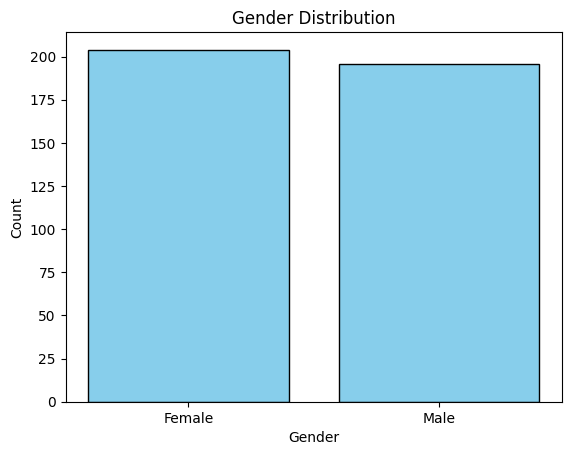

In [28]:
counts = df['Gender'].value_counts()

plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

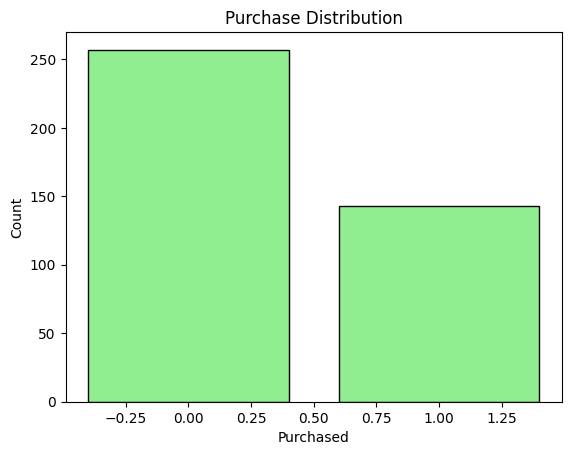

In [29]:
counts = df['Purchased'].value_counts()

plt.bar(counts.index, counts.values, color='lightgreen', edgecolor='black')
plt.title("Purchase Distribution")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()

In [30]:
X = df.drop("Purchased", axis=1).values
y = df["Purchased"].values

In [31]:
#klasycznie
# col = X[:,0]
# col[col == "Female"] = 0
# col[col == "Male"] = 1

#automat
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], shape=(400, 3), dtype=object)

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.30, random_state= 42)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 3), (280,), (120, 3), (120,))

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

d:\projektyP\SzkolenieAIPodstawy\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred = log_reg.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 0 0 0]


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# A confusion matrix is a table that is used to evaluate the performance of a classification model. It compares the predicted classifications to the true classifications, breaking down the results into four categories:

#     True Positive (TP): Instances where the model correctly predicted the positive class.
#     True Negative (TN): Instances where the model correctly predicted the negative class.
#     False Positive (FP): Instances where the model incorrectly predicted the positive class (Type I error).
#     False Negative (FN): Instances where the model incorrectly predicted the negative class (Type II error).


array([[71,  2],
       [15, 32]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120





    Precision:
        Precision measures the accuracy of positive predictions. For class 0, it's 0.83, indicating that when the model predicts class 0, it is correct 83% of the time. For class 1, the precision is 0.94, meaning that when the model predicts class 1, it is correct 94% of the time.

    Recall (Sensitivity):
        Recall measures the ability of the model to capture instances of a particular class. For class 0, it's 0.97, indicating that the model captures 97% of the actual instances of class 0. For class 1, the recall is 0.68, meaning the model captures 68% of the actual instances of class 1.

    F1-Score:
        F1-score is the harmonic mean of precision and recall, providing a balanced measure. For class 0, the F1-score is 0.89, and for class 1, it is 0.79.

    Support:
        Support is the number of actual occurrences of the class in the specified dataset. For class 0, there are 73 instances, and for class 1, there are 47 instances.

    Accuracy:
        Overall model accuracy is 0.86, meaning that the model correctly predicts the target variable for 86% of the instances in the dataset.

    Macro Avg:
        The macro average is the average of precision, recall, and F1-score across all classes. In this case, the macro average precision is 0.88, recall is 0.83, and F1-score is 0.84.

    Weighted Avg:
        The weighted average considers the number of occurrences of each class, providing a weighted average of precision, recall, and F1-score. It accounts for class imbalance. In this case, the weighted average precision is 0.87, recall is 0.86, and F1-score is 0.85.


In [39]:

# ----------------------
# KNN - Klasyfikacja k najbliższych sąsiadów
# Importujemy niezbędne klasy z biblioteki sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Ponownie definiujemy X i y (bez kolumny User ID)
# Zakładamy, że DataFrame df istnieje z wcześniejszych komórek
X = df[['Gender', 'Age', 'EstimatedSalary']].copy()

# Zakoduj zmienną Gender na 0 i 1 (LabelEncoder już użyto wcześniej)
# Jeżeli nie masz kolumny 'Gender_encoded', możesz ponownie wykorzystać LabelEncoder
labelencoder = LabelEncoder()
X['Gender'] = labelencoder.fit_transform(X['Gender'])

# Wektoryzujemy X i y
y = df['Purchased'].values
X_values = X.values

# Podział na zbiory treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_values, y, test_size=0.25, random_state=0)

# Skalowanie cech - ważne dla algorytmów opartych o odległość (KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tworzymy klasyfikator KNN
# Ustawiamy k (liczbę sąsiadów) na 5 - to popularny domyślny wybór, można eksperymentować
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Uczymy model na danych treningowych
knn_model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
knn_predictions = knn_model.predict(X_test)

# Ocena modelu: macierz pomyłek i raport klasyfikacji
print("Macierz pomyłek dla KNN:")
print(confusion_matrix(y_test, knn_predictions))
print("Raport klasyfikacji dla KNN:")
print(classification_report(y_test, knn_predictions))


Macierz pomyłek dla KNN:
[[64  4]
 [ 3 29]]
Raport klasyfikacji dla KNN:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [40]:

# ----------------------
# Przykładowe ręczne predykcje
# Wprowadź kilka przykładowych danych (Gender [0=Female,1=Male], Age, EstimatedSalary)
# Najpierw przeskaluj nowe dane za pomocą wcześniej wyuczonego skalera

# Przykład 1: Kobieta, 30 lat, zarobki 50 000
sample1 = [[0, 30, 50000]]

# Przykład 2: Mężczyzna, 40 lat, zarobki 80 000
sample2 = [[1, 40, 80000]]

samples = sample1 + sample2
samples_scaled = scaler.transform(samples)

# Predykcje dla przykładów
preds = knn_model.predict(samples_scaled)

print("Predykcje dla przykładowych osób:")
for i, p in enumerate(samples):
    gender = 'Male' if p[0] == 1 else 'Female'
    print(f"Osoba {i+1}: Płeć={gender}, Wiek={p[1]}, Pensja={p[2]} → Czy kupi?", 'Tak' if preds[i] == 1 else 'Nie')


Predykcje dla przykładowych osób:
Osoba 1: Płeć=Female, Wiek=30, Pensja=50000 → Czy kupi? Nie
Osoba 2: Płeć=Male, Wiek=40, Pensja=80000 → Czy kupi? Nie
